In [1]:
import sys
print(sys.version)

3.9.18 (main, Sep 11 2023, 13:41:44) 
[GCC 11.2.0]


In [2]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras
os.environ['KERAS_BACKEND'] = 'tensorflow'
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
image_directory = '../data/lung_cancer_dataset/'
IMAGE_SIZE = 256

In [5]:
os.listdir(image_directory)

['augmented_benign', 'benign', 'malignant', 'normal']

In [6]:
benign_data = []
benign_images = os.listdir(image_directory + 'benign/')
for i, image_name in enumerate(benign_images):
     if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'benign/' + image_name)
        image = Image.fromarray(image)
        image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
        benign_data.append(np.array(image))

In [7]:
print(len(benign_data))

120


In [8]:
malignant_data = []
malignant_images = os.listdir(image_directory + 'malignant/')
for i, image_name in enumerate(malignant_images):
     if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'malignant/' + image_name)
        image = Image.fromarray(image)
        image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
        malignant_data.append(np.array(image))

In [9]:
print(len(malignant_data))

561


In [10]:
normal_data = []
normal_images = os.listdir(image_directory + 'normal/')
for i, image_name in enumerate(normal_images):
     if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'normal/' + image_name)
        image = Image.fromarray(image)
        image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
        normal_data.append(np.array(image))

In [11]:
print(len(normal_data))

416


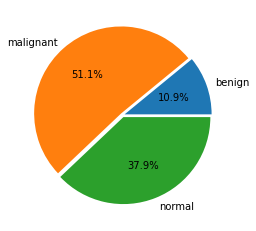

In [12]:
datalabels = ["benign", "malignant", "normal"]
plt.pie([len(benign_data), len(malignant_data), len(normal_data)], labels = datalabels, autopct='%.1f%%',explode=(0.025,0.025,0.025))
plt.show()

In [ ]:
def open_images(paths):
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(train_paths[50:59])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

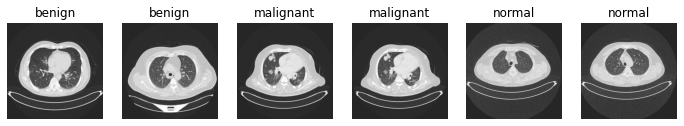

In [13]:
fig = plt.figure(figsize=(12,12))
for i in range(1,3):
    fig.add_subplot(2,6,i)
    plt.axis('off')
    plt.title('benign')
    plt.imshow(benign_data[i])
for i in range(3,5):
    fig.add_subplot(2,6,i)
    plt.axis('off')
    plt.title('malignant')
    plt.imshow(malignant_data[i])
for i in range(5,7):
    fig.add_subplot(2,6,i)
    plt.axis('off')
    plt.title('normal')
    plt.imshow(normal_data[i])
plt.show()

In [12]:
benign_labels = [0] * len(benign_data)
malignant_labels = [1] * len(malignant_data)
normal_labels = [2] * len(normal_data)

In [ ]:
benign_x_train, benign_x_test, benign_y_train, benign_y_test = train_test_split(
    benign_data, benign_labels, test_size = 0.2, random_state = 42)
malignant_x_train, malignant_x_test, malignant_y_train, malignant_y_test = train_test_split(
    malignant_data, malignant_labels, test_size = 0.2, random_state = 42)
normal_x_train, normal_x_test, normal_y_train, normal_y_test = train_test_split(
    normal_data, normal_labels, test_size = 0.2, random_state = 42)

In [ ]:
x_training_data = benign_x_train + malignant_x_train + normal_x_train
y_training_data = benign_y_train + malignant_y_train + normal_y_train

In [ ]:
y_training_data = to_categorical(np.array(y_training_data))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=45, 
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect', cval=125)    #Also try nearest, constant, reflect, wrap


In [ ]:
i = 0
for batch in datagen.flow(np.array(benign_data), batch_size=3,
                          save_to_dir='../data/lung_cancer_dataset/augmented_benign', 
                          save_prefix='aug', 
                          save_format='jpg'):
    i += 1
    if i >= 120:
        break  # otherwise the generator would loop indefinitely  

In [13]:
augmented_benign_images = os.listdir(image_directory + 'augmented_benign/')
for i, image_name in enumerate(augmented_benign_images):
     if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'augmented_benign/' + image_name)
        image = Image.fromarray(image)
        image = image.resize((IMAGE_SIZE, IMAGE_SIZE))
        benign_data.append(np.array(image))

In [14]:
dataset = benign_data + malignant_data + normal_data
labels = [0] * len(benign_data) + [1] * len(malignant_data) + [2] * len(normal_data)

In [15]:
print(len(dataset))
print(len(labels))

1457
1457


In [16]:
x_train, x_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(labels)), test_size = 0.20, random_state = 0)

In [17]:
print(dataset[0].shape)

(256, 256, 3)


In [18]:
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size= (2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(3, activation='sigmoid')(drop4)

model = keras.Model(inputs = inp, outputs= out)
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248  

In [19]:
train = model.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 32, 
                         verbose = 1, 
                         epochs = 5,
                         validation_split = 0.1,
                         shuffle = False
                     )

Epoch 1/5


InternalError: Graph execution error:

Detected at node 'StatefulPartitionedCall_16' defined at (most recent call last):
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 374, in dispatch_queue
      yield self.process_one()
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 250, in wrapper
      runner = Runner(ctx_run, result, future, yielded)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 748, in __init__
      self.ctx_run(self.run)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-19-52cb9b3ee059>", line 1, in <module>
      train = model.fit(np.array(x_train),
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1054, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer.py", line 543, in minimize
      self.apply_gradients(grads_and_vars)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer.py", line 1174, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer.py", line 650, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer.py", line 1200, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer.py", line 1250, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/home/yrx13/miniconda3/envs/tf/lib/python3.9/site-packages/keras/optimizers/optimizer.py", line 1245, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_16'
libdevice not found at ./libdevice.10.bc
	 [[{{node StatefulPartitionedCall_16}}]] [Op:__inference_train_function_2740]

In [ ]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))